# Logistic Regression with Python

Take a look at below questions.

- Customer entered in the shop will buy the MacBook or not?
- Will you get admit to a good university in this fall ?
- Is the tumour malignant or benign ?

Above and many more similar to these questions can be answered using Machine Learning algorithm. The widely known algorithm used for this kind of problems is Logistic Regression.

### What is Logistic Regression ?

*'Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function'.*

Lets understand few terms mentioned above.

*Dependant variable* : This is the ouput we need to predict. This is also called as Target Class.

*Independant variable* : These are one or more input variables(also called as features/attributes) which are analysed to predict the target class.

*Logistic fucntion* : This is the heart of this algorithm which does the job of predicting the likelihood occurance of an event.

### How does Logistic Regression work ?

Logistic regression is the part of GLM i.e. Generalized Linear Model. It contains Linear models and Logistic regressions.

We all are familiar with Linear Regression in which we try to fit the straight line to predict the output which is continous variable. Using this line we can predict the target value for any given input value. 

The same straight line can't be fitted in Logistic regression model.Here, we try to fit a 'S' shaped curve over the data. The curve goes from 0 to 1 which is nothing but the probability of the event occuring.

This probability curve is then converted to log(odds of event happening) using formula: $log( p ) / log (1 - p)$. This is knwon as **Logit function**.

Just like Linear regression uses Least Squared Error to fit the line, Logistic uses Maximum Likelihood to do the same.
It is calculated using formula : $e^{log(odd)} / 1 + e^{log(odd)}$

This model's ability to provide probabilities and classify new samples using continous and discrete measurements makes it popular machine learning method. Lets solve one dataset using logistic regression.

Most of the times logistic regression is used to predict Binary outcome i.e. Yes / No , Positive / Negative, True / False, Happy / Sad.

### Logistic regression problem

In this example, a logistic regression is performed on a data set containing bank marketing information to predict whether or not a customer subscribed for a term deposit.

*Bank Marketing Data Set* which contains information related to a campaign by a Portuguese banking institution to get its customers to subscribe for a term deposit.

The dataset has following variables :
- age : Age of the client
- job : Client's occupation
- duration : Duration of last contact in seconds
- previous : Number of contacts performed before this campaign for this client
- emp.var.rate : Employment variation rate (quarterly indicator)
- housing : Indicates whether the client has a housing loan
- default : Indicates whether the client has credit in default
- loan : Indicates whether the client as a personal loan
- poutcome : Outcome of the previous marketing campaign
- marital : Marital status
- education : Client's education level
- contact : Type of contact communication
- month : Month that last contact was made
- day_of_week : Day that last contact was made
- campaign : Number of contacts performed during this campaign for this client (including last contact)
- pdays : Number of days since the client was last contacted in a previous campaign
- cons.price.idx : Consumer price index (monthly indicator)
- cons.conf.idx : Consumer confidence index (monthly indicator)
- euribor3m : Euribor 3-month rate (daily indicator)
- nr.employed : Number of employees (quarterly indicator)

As a response, the column y is used, which is yes if a customer has subscribed for a term deposit. 
- y : Indicates whether the client has subscribed for a term deposit

Lets start with the solution.

### Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
columnsToUse = ['age','job','duration','previous','housing','default','loan','poutcome','marital','education','contact','month',
                'day_of_week','campaign','pdays','y']

data = pd.read_csv('bank data.csv',sep=';',usecols=columnsToUse)
data2 = data

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 16 columns):
age            4119 non-null int64
job            4119 non-null object
marital        4119 non-null object
education      4119 non-null object
default        4119 non-null object
housing        4119 non-null object
loan           4119 non-null object
contact        4119 non-null object
month          4119 non-null object
day_of_week    4119 non-null object
duration       4119 non-null int64
campaign       4119 non-null int64
pdays          4119 non-null int64
previous       4119 non-null int64
poutcome       4119 non-null object
y              4119 non-null object
dtypes: int64(5), object(11)
memory usage: 515.0+ KB


In [5]:
#check null values if any
data.apply(lambda x: sum(x.isnull()))

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [6]:
#check summary of the dataframe
data.describe()

,age,duration,campaign,pdays,previous
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337
std,10.313362,254.703736,2.568159,191.922786,0.541788
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000


### Exploratory data analysis:

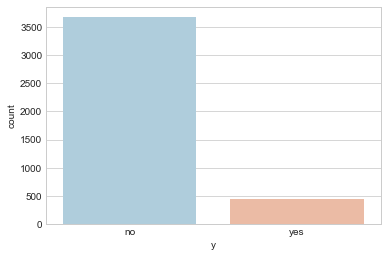

In [7]:
sns.countplot(x='y',data=data,palette='RdBu_r')

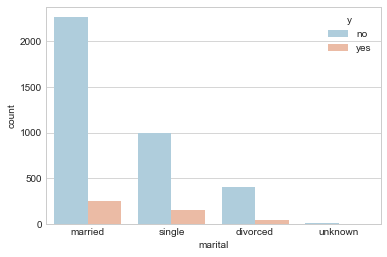

In [8]:
sns.countplot(x='marital',hue='y',data=data2,palette='RdBu_r')

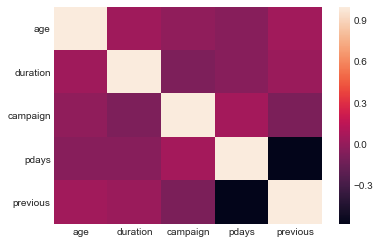

In [9]:
sns.heatmap(data.corr())

(array([5.600e+02, 1.053e+03, 8.240e+02, 5.280e+02, 3.280e+02, 2.160e+02,
        1.440e+02, 9.900e+01, 9.500e+01, 6.300e+01, 4.400e+01, 3.800e+01,
        1.500e+01, 2.500e+01, 1.300e+01, 1.900e+01, 1.400e+01, 7.000e+00,
        1.000e+01, 7.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   0.  ,   72.86,  145.72,  218.58,  291.44,  364.3 ,  437.16,
         510.02,  582.88,  655.74,  728.6 ,  801.46,  874.32,  947.18,
        1020.04, 1092.9 , 1165.76, 1238.62, 1311.48, 1384.34, 1457.2 ,
        1530.06, 1602.92, 1675.78, 1748.64, 1821.5 , 1894.36, 1967.22,
        2040.08, 2112.94, 2185.8 , 2258.66, 2331.52, 2404.38, 2477.24,
        2550.1 , 2622

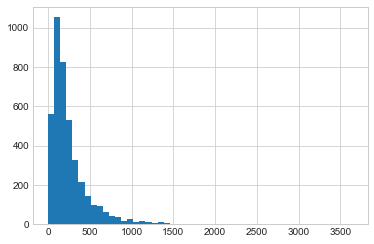

In [10]:
plt.hist(x='duration',data=data,bins=50)

(array([  8.,  17.,  73., 206., 247., 368., 560., 340., 287., 383., 220.,
        201., 292., 170., 154., 234., 136., 113.,  43.,   9.,   9.,  10.,
          7.,   5.,   9.,   5.,   4.,   5.,   1.,   3.]),
 array([18.        , 20.33333333, 22.66666667, 25.        , 27.33333333,
        29.66666667, 32.        , 34.33333333, 36.66666667, 39.        ,
        41.33333333, 43.66666667, 46.        , 48.33333333, 50.66666667,
        53.        , 55.33333333, 57.66666667, 60.        , 62.33333333,
        64.66666667, 67.        , 69.33333333, 71.66666667, 74.        ,
        76.33333333, 78.66666667, 81.        , 83.33333333, 85.66666667,
        88.        ]),
 <a list of 30 Patch objects>)

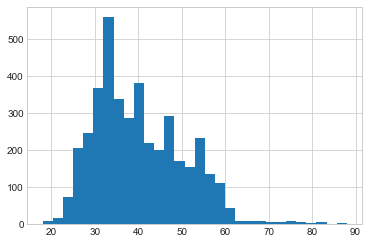

In [11]:
plt.hist(x='age',data=data,bins=30)

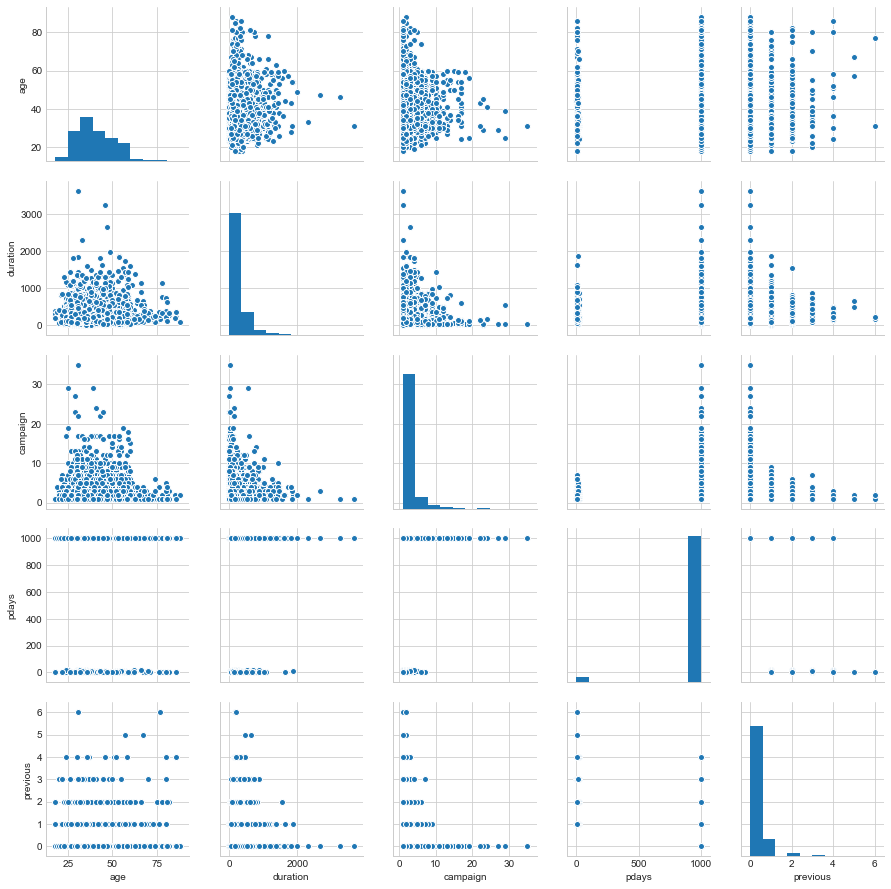

In [12]:
sns.pairplot(data)

In [13]:
#check unique values
data.apply(lambda x: len(x.unique()))

age             67
job             12
marital          4
education        8
default          3
housing          3
loan             3
contact          2
month           10
day_of_week      5
duration       828
campaign        25
pdays           21
previous         7
poutcome         3
y                2
dtype: int64

### Dealing with categorial variables

In [14]:
#create a list of categorical columns
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']

In [15]:
categorical_columns = [x for x in categorical_columns if x not in ['y']]

In [16]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [17]:
#check frequency of values which are present in categorical columns
for  col  in  categorical_columns :
    print('\nfreq of categories for variable %s'%col)
    print(data[col].value_counts())


freq of categories for variable job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

freq of categories for variable marital
married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

freq of categories for variable education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

freq of categories for variable default
no         3315
unknown     803
yes           1
Name: default, dtype: int64

freq of categories for variable housing
yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

freq o

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
var_mod = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [21]:
data = pd.get_dummies(data, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [22]:
data.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [23]:
data.dtypes

age              int64
duration         int64
campaign         int64
pdays            int64
previous         int64
y                int64
job_0            uint8
job_1            uint8
job_2            uint8
job_3            uint8
job_4            uint8
job_5            uint8
job_6            uint8
job_7            uint8
job_8            uint8
job_9            uint8
job_10           uint8
job_11           uint8
marital_0        uint8
marital_1        uint8
marital_2        uint8
marital_3        uint8
education_0      uint8
education_1      uint8
education_2      uint8
education_3      uint8
education_4      uint8
education_5      uint8
education_6      uint8
education_7      uint8
default_0        uint8
default_1        uint8
default_2        uint8
housing_0        uint8
housing_1        uint8
housing_2        uint8
loan_0           uint8
loan_1           uint8
loan_2           uint8
contact_0        uint8
contact_1        uint8
month_0          uint8
month_1          uint8
month_2    

In [24]:
data.head()

,age,duration,campaign,pdays,previous,y,job_0,job_1,job_2,job_3,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,30,487,2,999,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
print(data.shape)

(4119, 59)


### Using Logistic Regression

In [26]:
data_y = pd.DataFrame(data['y'])
data_X = data.drop(['y'], axis=1)
print(data_X.columns)
print(data_y.columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'job_0', 'job_1',
       'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9',
       'job_10', 'job_11', 'marital_0', 'marital_1', 'marital_2', 'marital_3',
       'education_0', 'education_1', 'education_2', 'education_3',
       'education_4', 'education_5', 'education_6', 'education_7', 'default_0',
       'default_1', 'default_2', 'housing_0', 'housing_1', 'housing_2',
       'loan_0', 'loan_1', 'loan_2', 'contact_0', 'contact_1', 'month_0',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'day_of_week_0', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'poutcome_0',
       'poutcome_1', 'poutcome_2'],
      dtype='object')
Index(['y'], dtype='object')


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=2)

In [29]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(2883, 58)
(1236, 58)
(2883, 1)
(1236, 1)


In [30]:
clf = LogisticRegression()

In [31]:
clf.fit(X_train, y_train)

C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred = clf.predict(X_test)

### Model Evaluation

In [33]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9110032362459547


In [34]:
predictions = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
print(confusion_matrix(y_test, predictions))

# New line
print('\n')

# Classification report
print(classification_report(y_test,predictions))

[[1082   21]
 [  89   44]]


             precision    recall  f1-score   support

          0       0.92      0.98      0.95      1103
          1       0.68      0.33      0.44       133

avg / total       0.90      0.91      0.90      1236



### ROC-AUC curve for binary classifier

ROC curves are typically used in binary classification to study the output of a classifier. ROC stands for *Receiver Operating Characteristic (ROC)* and AUC is *Area under the curve*

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc_score(y_test, y_pred)

0.6558940415408422

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

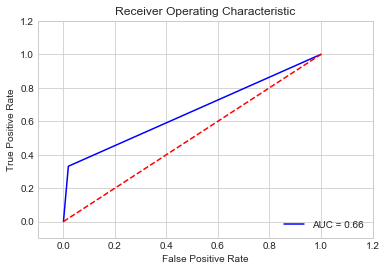

In [37]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()